## Проектная работа по курсу "Теория вероятностей и математическая статистика"
### Исполнитель: Васильев Антон

### Имеется датасет с средними ценами на авокадо и объемами продаж на нескольких рынках США.
Данный датасет взят с Kaggle.com (https://www.kaggle.com/neuromusic/avocado-prices).  
__Описание датасета:__ 
В датасете представлены еженедельные данные сканирования розничной торговли за 2018 год. Данные сканирования розничной торговли поступают непосредственно с кассовый аппаратов розничных продавцов, основанных на фактических розничных продажах авокадо Hass. Данные были выгружены с сайта Hass Avocado Board в мае 2018 года.

__Описание некоторых столбцов в наборе данных__  
Date - дата наблюдения  
AveragePrice - средняя цена одного авокадо  
type - тип: обычные (conventional) или органические (organic)   
year - год  
Region - город или регион наблюдения  
Total Volume - общее количество проданных авокадо  
4046 - общее количество проданных авокадо с кодом PLU 4046  
4225 - общее количество проданных авокадо с кодом PLU 4225  
4770 - общее количество проданных авокадо с кодом PLU 4770  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Предполагаю, что средние цены на авокадо типов conventional и organic представляют собой две разные генеральных совокупности.
__Нулевая гипотеза:__ средние стоимости авокадо из групп conventional и organic принадлежат одной генеральной совокупности.   
__Альтернативная гипотиза:__ средние стоимости авокадо из групп conventional и organic принадлежат разным генеральным совокупностям.  
$H_0:\mu_c = \mu_o$  
$H_1: \mu_c \neq \mu_o$  
__Критерий:__ t-критерий  
__Уровень значимости:__ $\alpha=0.05$  
__Критическая область:__ двухсторонняя

_Загружаю датасет из файла_

In [2]:
df = pd.read_csv('avocado.csv', index_col=0)

In [3]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [4]:
df.tail()

Date  AveragePrice  Total Volume     4046     4225    4770  \
7   2018-02-04          1.63      17074.83  2046.96  1529.20    0.00   
8   2018-01-28          1.71      13888.04  1191.70  3431.50    0.00   
9   2018-01-21          1.87      13766.76  1191.92  2452.79  727.94   
10  2018-01-14          1.93      16205.22  1527.63  2981.04  727.01   
11  2018-01-07          1.62      17489.58  2894.77  2356.13  224.53   

    Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
7     13498.67    13066.82      431.85          0.0  organic  2018   
8      9264.84     8940.04      324.80          0.0  organic  2018   
9      9394.11     9351.80       42.31          0.0  organic  2018   
10    10969.54    10919.54       50.00          0.0  organic  2018   
11    12014.15    11988.14       26.01          0.0  organic  2018   

              region  
7   WestTexNewMexico  
8   WestTexNewMexico  
9   WestTexNewMexico  
10  WestTexNewMexico  
11  WestTexNewMexico

In [5]:
df.shape

(18249, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [7]:
# Количество наблюдений по типам
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(df['AveragePrice'], bins=30)

plt.subplot(1, 3, 2)
st.probplot(df['AveragePrice'], plot=plt)

plt.subplot(1, 3, 3)
plt.boxplot(df['AveragePrice'])

plt.show()

_Отбираю средние цены в разные датасеты_

In [9]:
df_conventional = df.loc[df['type'] == 'conventional', 'AveragePrice']
df_conventional.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [10]:
df_conventional.shape

(9126,)

In [11]:
df_organic = df.loc[df['type'] == 'organic', 'AveragePrice']
df_organic.head()

0    1.83
1    1.89
2    1.85
3    1.84
4    1.94
Name: AveragePrice, dtype: float64

In [12]:
df_organic.shape

(9123,)

Т.к. в каждой из выборок более 9000 наблюдений, критерий Шапиро-Уилка не даст верную оценку нормальности распределения. Поэтому строю QQ-plot и гистограмму для визуальной проверки выборок на нормальность распределения.

In [13]:
plt.figure(figsize=(10, 16))

plt.subplot(3, 2, 1)
plt.hist(df_conventional, bins=20)
plt.title('Conventional avocado price histogramm')
plt.xlabel('Average price')

plt.subplot(3, 2, 2)
plt.hist(df_organic, bins=20)
plt.title('Organic avocado price histogramm')
plt.xlabel('Average price')

plt.subplot(3, 2, 3)
st.probplot(df_conventional, plot=plt)
plt.title('Conventional avocado price QQ-plot')

plt.subplot(3, 2, 4)
st.probplot(df_organic, plot=plt)
plt.title('Organic avocado price QQ-plot')

plt.subplot(3, 2, 5)
plt.boxplot(df_conventional)
plt.title('Conventional avocado price boxplot')

plt.subplot(3, 2, 6)
plt.boxplot(df_organic)
plt.title('Organic avocado price boxplot')

plt.show()

Визуально данные выборки имеют распределение, близкое к нормальному.  
Использую критерий Бартлетта для проверки равенства дисперсий выборок.

In [14]:
st.bartlett(df_conventional, df_organic)

BartlettResult(statistic=938.4320840472095, pvalue=4.338496041489647e-206)

_Т.к. значение pvalue < 0.05, значит дисперсии выборок не равны. Для проверки гипотизы использую t-критерий Уэлча._

In [15]:
st.ttest_ind(df_conventional, df_organic, equal_var=False)

Ttest_indResult(statistic=-105.5824212152093, pvalue=0.0)

#### Т.к. $\mbox{pvalue} < 0.05$, то есть основание отвергнуть нулевую гипотизу.
#### Могу сделать вывод, что получено статестически значимое различие между выборками.
_Для визуального подтверждения различия средних значений выборок строю доверительные интервалы._

* Для типа conventional: $n_c=9126,\,\,\, \overline X_c = 1.158,\,\,\, \sigma_c=0.263,\,\,\, t_{\alpha / 2}=2.262\,\,\, \Rightarrow \bigl[1.151,1.165\bigr]$
* Для типа organic: $n_o=9123,\,\,\, \overline X_o = 1.654,\,\,\, \sigma_o=0.364,\,\,\, t_{\alpha / 2}=2.262\,\,\, \Rightarrow \bigl[1.645,1.663\bigr]$

In [16]:
print(f'Conventional: n={len(df_conventional)}, mean={df_conventional.mean()}, std={np.std(df_conventional, ddof=1)}, var={np.var(df_conventional, ddof=1)}')
print(f'Organic: n={len(df_organic)}, mean={df_organic.mean()}, std={np.std(df_organic, ddof=1)}, var={np.var(df_organic, ddof=1)}')

Conventional: n=9126, mean=1.1580396668858206, std=0.2630406041140183, var=0.06919035941266771
Organic: n=9123, mean=1.6539986846432082, std=0.3635016200174916, var=0.13213342775534084


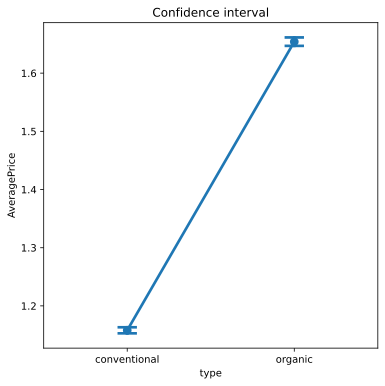

In [17]:
plt.figure(figsize=(6, 6))

sns.pointplot(x='type', y='AveragePrice', data=df[['AveragePrice', 'type']], capsize=.1)
plt.title('Confidence interval')

plt.show()

__Доверительные интервалы также показывают, что выборки имеют существенные различия.__